# Load multiple libraries related to model


In [1]:
import pandas as pd
import numpy as np
!pip3 install yfinance
import yfinance as yf

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,5

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 10))
from datetime import datetime , timedelta
import seaborn as sns
import re

     |████████████████████████████████| 6.3MB 8.1MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=9e6cfb976534be080e6161e9e7781b0a5143271c9757b1d32a194418acae3778
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


# Loading Data from Yfinance

In [2]:
print(" Welcome to Neha's stock predictor")
start_date=input("Enter the starting date :(format -->  \"yyyy-mm-dd\" ) ")
date_pattern = re.compile("[0-2][0-9][0-9][0-9]-[0-1][0-9]-[0-3][0-9]")
while(len(date_pattern.findall(start_date)) == 0):
  start_date=input("Enter the starting date in correct form :(format -->  \"yyyy-mm-dd\" )")
start_date=datetime.strptime(start_date,"%Y-%m-%d")
#print(start_date)

end_date = start_date + timedelta(days=3*365) # taken 3 years data from start date
#print(end_date)

df1 = yf.download("MSFT", start=start_date, end=end_date ) # taken MSFT dataset from yfinance
print(df1.shape)

 Welcome to Neha's stock predictor
Enter the starting date :(format -->  "yyyy-mm-dd" ) 2017-05-23
[*********************100%***********************]  1 of 1 completed
(755, 6)


# Exploring Data

In [3]:
df1=df1.dropna()
df1['ohlc']=df1[['Open', "High","Low","Close"]].mean(axis=1)
print(df1.dtypes)
df1.head()

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
ohlc         float64
dtype: object


,Open,High,Low,Close,Adj Close,Volume,ohlc
Date,,,,,,,
2017-05-23,68.720001,68.750000,68.379997,68.680000,65.004425,15425800,68.632500
2017-05-24,68.870003,68.879997,68.449997,68.769997,65.089622,14593900,68.742498
2017-05-25,68.970001,69.879997,68.910004,69.620003,65.894119,21854100,69.345001
2017-05-26,69.800003,70.220001,69.519997,69.959999,66.215904,19827900,69.875000
2017-05-30,69.790001,70.410004,69.769997,70.410004,66.641869,17072800,70.095001


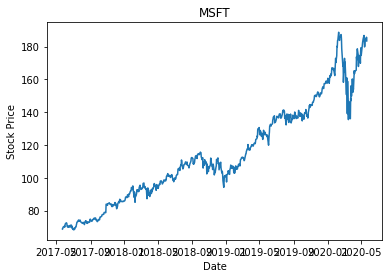

In [4]:
plt.plot(df1['Close'])
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('MSFT')
plt.show()

In [5]:
df1=df1[['Open', "High","Low","Volume","Adj Close","Close",'ohlc']]
df_volume=df1[['Volume']]
df1=df1.drop(['Volume'],axis=1)
df1.dtypes

Open         float64
High         float64
Low          float64
Adj Close    float64
Close        float64
ohlc         float64
dtype: object

               Open      High       Low  Adj Close     Close      ohlc
Open       1.000000  0.999061  0.999079   0.998333  0.998339  0.999585
High       0.999061  1.000000  0.998191   0.998979  0.998905  0.999511
Low        0.999079  0.998191  1.000000   0.998876  0.998980  0.999521
Adj Close  0.998333  0.998979  0.998876   1.000000  0.999942  0.999498
Close      0.998339  0.998905  0.998980   0.999942  1.000000  0.999521
ohlc       0.999585  0.999511  0.999521   0.999498  0.999521  1.000000


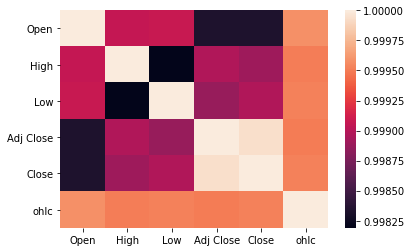

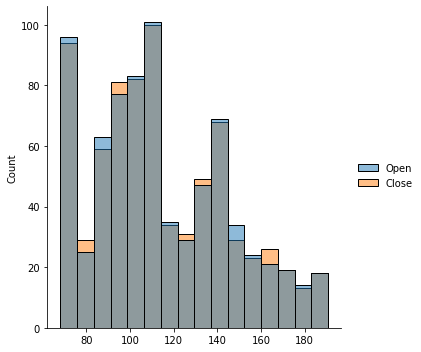

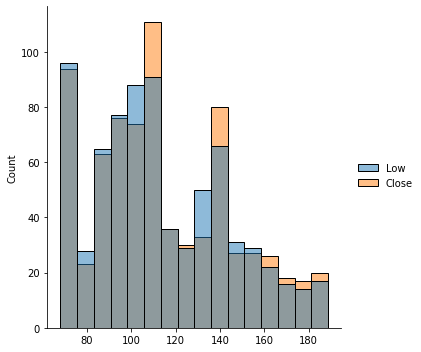

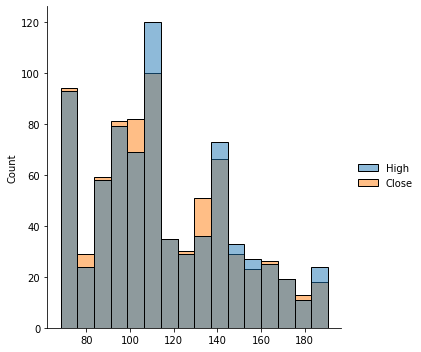

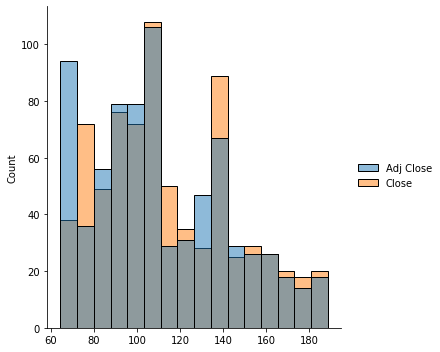

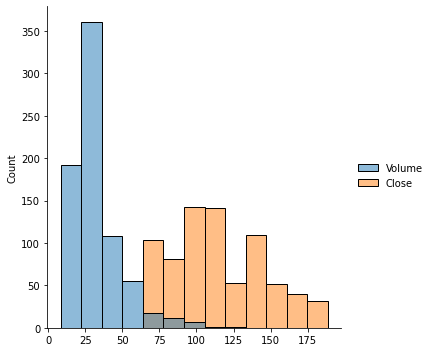

In [6]:

df1_scaled = pd.DataFrame(scaler.fit_transform(df1) , columns=['Open', "High","Low","Adj Close","Close",'ohlc']) 
print(df1_scaled.corr())
sns.heatmap(df1_scaled.corr())
sns.displot([df1['Open'],df1["Close"]],kde = False , color=["b","r"],alpha=0.5)
sns.displot([df1['Low'],df1["Close"]],kde = False , color=["b","r"],alpha=0.5)
sns.displot([df1['High'],df1["Close"]],kde = False , color=["b","r"],alpha=0.5)
sns.displot([df1['Adj Close'],df1["Close"]],kde = False , color=["b","r"],alpha=0.5)
sns.displot([df_volume['Volume'].divide(900000).round(6),df1["Close"]],kde = False , color=["b","r"],alpha=0.5)
plt.show()

# Spliting the dataset 

In [7]:

X=df1[['ohlc']]
# X=df1[['Volume']]
# X=X.divide(900000).round(6)
Y=df1[['Close']]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=False)
print(X_train.shape , Y_train.shape)
date_train = []
date_test = []
for row in X_train.index:
    date_train.append(row)
for row in X_test.index:
    date_test.append(row)
#X_train.head()

(679, 1) (679, 1)


In [8]:
#X_train_scaled = scaler.fit_transform(X_train)

# Gridsearch cross validation
  We tried validating the best parameters by using gridsearch but results were not as expected.

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
grid_params={
    'n_neighbors':[i for i in range(30)],
    'weights':['uniform','distance'],
    'metric':['euclidean', 'manhattan']
}
gs= GridSearchCV(neighbors.KNeighborsRegressor(),grid_params , verbose = 1 , cv =3 , n_jobs = -1 )
gs_results = gs.fit(X_train,Y_train)
print(gs_results.best_score_)
print(gs_results.best_params_)
gs_results.score(X_test,Y_test)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.0s


-1.614573291188288
{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.4s finished


0.766973322668147

# K Nearest Neighbor

In [10]:
#Using K value with minimum error score
K=int(gs_results.best_params_['n_neighbors'])
knn = neighbors.KNeighborsRegressor(n_neighbors = K, weights='uniform',metric="euclidean")
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
error = sqrt(mean_squared_error(Y_test,Y_pred))
print(error)
print("The rmse error is",error)

6.984150464172736
The rmse error is 6.984150464172736


# Buy, Sell or Hold 

In [11]:
avg_close = Y_train["Close"].mean()
print("Average share price of microsoft - {}" .format(avg_close))
results=[]
for i in range (1,len(Y_pred)):
  if Y_pred[i]>Y_pred[i-1] and Y_pred[i-1]>avg_close:
    #the price is increasing so profit is there in buying
    ans="For date {}".format(date_test[i])
    ans=ans[0:-8]
    ans2="suggestion is to buy "
    results.append(ans+ans2)
    print(ans+ans2)
  elif Y_pred[i]<Y_pred[i-1] and Y_pred[i-1]<=avg_close:
    #the price is decreasing and is below average so sell asap 
    ans="For date {}".format(date_test[i])
    ans=ans[0:-8]
    ans2="suggestion is to sell "
    results.append(ans+ans2)
    print(ans+ans2)
  elif Y_pred[i]<Y_pred[i-1] and Y_pred[i-1]>avg_close:
    #the price is decreasing but still above average so wait for it to rise
    ans="For date {}".format(date_test[i])
    ans=ans[0:-8]
    ans2="suggestion is to hold "
    results.append(ans+ans2)
    print(ans+ans2)
  elif Y_pred[i]>Y_pred[i-1] and Y_pred[i-1]<=avg_close:
    #the price is increasing and is below average hence will be benficial to buy
    ans="For date {}".format(date_test[i])
    ans=ans[0:-8]
    ans2="suggestion is to buy"
    results.append(ans+ans2)
    print(ans+ans2)
  elif Y_pred[i]==Y_pred[i-1]:
    #no change in market position so better to hold
    ans="For date {}".format(date_test[i])
    ans=ans[0:-8]
    ans2="suggestion is to hold "
    results.append(ans+ans2)
    print(ans+ans2)

Average share price of microsoft - 108.35440365730926
For date 2020-02-05 suggestion is to hold 
For date 2020-02-06 suggestion is to hold 
For date 2020-02-07 suggestion is to hold 
For date 2020-02-10 suggestion is to hold 
For date 2020-02-11 suggestion is to hold 
For date 2020-02-12 suggestion is to hold 
For date 2020-02-13 suggestion is to hold 
For date 2020-02-14 suggestion is to hold 
For date 2020-02-18 suggestion is to hold 
For date 2020-02-19 suggestion is to hold 
For date 2020-02-20 suggestion is to hold 
For date 2020-02-21 suggestion is to hold 
For date 2020-02-24 suggestion is to hold 
For date 2020-02-25 suggestion is to buy 
For date 2020-02-26 suggestion is to hold 
For date 2020-02-27 suggestion is to hold 
For date 2020-02-28 suggestion is to hold 
For date 2020-03-02 suggestion is to buy 
For date 2020-03-03 suggestion is to hold 
For date 2020-03-04 suggestion is to hold 
For date 2020-03-05 suggestion is to hold 
For date 2020-03-06 suggestion is to hold 
Fo

In [12]:
Y_test_list = np.array(Y_test.values.tolist()).flatten()
Y_train_list = np.array(Y_train.values.tolist()).flatten()
X_train_list = np.array(X_train.values.tolist()).flatten()
X_test_list = np.array(X_test.values.tolist()).flatten()
Y_pred=Y_pred.flatten()
print(Y_pred.shape)
print(Y_test_list.shape)
print(Y_train_list.shape)
print("maximum feature value in the X_train {} & corresponding value of it in Y_train is {} .".format(np.amax(X_train_list),Y_train_list[np.argmax(X_train_list)]))
print(Y_pred[:15],end=" ")

(76,)
(76,)
(679,)
maximum feature value in the X_train 172.91749954223633 & corresponding value of it in Y_train is 172.77999877929688 .
[172.77999878 172.77999878 172.77999878 172.77999878 172.77999878
 172.77999878 172.77999878 172.77999878 172.77999878 172.77999878
 172.77999878 172.77999878 172.77999878 168.03999329 170.22999573] 

# Finding Accuracy

In [13]:
error_limit = 10.0
average_difference=0
correct=0
wrong=0
for i in range(len(Y_pred)):
  if abs(Y_pred[i]-Y_test_list[i])<=error_limit :
    correct+=1
  else:
    wrong+=1 
  average_difference+=abs(Y_pred[i]-Y_test_list[i])
print("Number of correct predictions with error limit {} is {}".format(error_limit, correct))
print("Number of incorrect predictions with error limit {} is {}".format(error_limit, wrong))
print("Average deviation for predictions {}".format(average_difference/len(Y_pred)))
#print(correct , wrong , type(average_difference))
accuracy=(correct/(correct+wrong))*100
print("Accuracy for predictions is", accuracy)

Number of correct predictions with error limit 10.0 is 58
Number of incorrect predictions with error limit 10.0 is 18
Average deviation for predictions 5.44144720780222
Accuracy for predictions is 76.31578947368422


# Plotting the Prediction


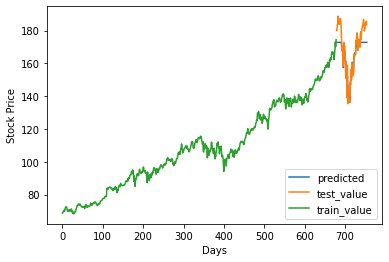

In [14]:
x_ax=range(len(Y_test_list)+len(Y_train_list))
plt.plot(x_ax[len(Y_train_list):len(Y_test_list)+len(Y_train_list)] , Y_pred[:])
plt.plot(x_ax[len(Y_train_list):len(Y_test_list)+len(Y_train_list)],Y_test_list[:])
plt.plot(x_ax[:len(Y_train_list)],Y_train_list[:])
plt.xlabel('Days')
plt.ylabel('Stock Price')
#plt.xticks(date_test)
plt.legend(["predicted", "test_value","train_value"], loc ="lower right")

# Predicted Vs Actual Values

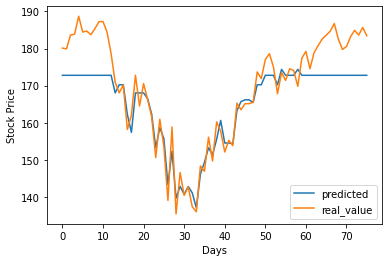

In [15]:
plt.plot(Y_pred)
plt.plot(Y_test_list)
plt.xlabel('Days')
plt.ylabel('Stock Price')
#plt.xticks(date_test)
plt.legend(["predicted", "real_value"], loc ="lower right")